In [1]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patheffects as PathEffects
from PIL import Image, ImageDraw, ImageOps
%matplotlib inline
import seaborn as sns
import random
import os
import gc

from sklearn.manifold import TSNE
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, Sequential
from tensorflow.keras import optimizers

from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, SeparableConv2D


from tensorflow.keras.applications.vgg16 import VGG16

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from keras.preprocessing.image import img_to_array, load_img

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve


In [2]:
train_dir = r"C:/Users/yalal/Downloads/autisum spectrum/train"
test_dir = r"C:/Users/yalal/Downloads/autisum spectrum/test"

In [3]:
import os
import random
import gc

train_non_autistic = []
train_autistic = []

# Directory paths
train_dir = r"C:/Users/yalal/Downloads/autisum spectrum/train"
test_dir = r"C:/Users/yalal/Downloads/autisum spectrum/test"

#train_dir = train_dir[:-15]
#test_dir = test_dir[:-15]

#test have how many extrasa mE ?same 
# Separate images into 'Autistic' and 'Non-Autistic' lists based on file names
for i in os.listdir(train_dir):
    file_path = os.path.join(train_dir, i)
    if 'Non_Autistic' in i:
        train_non_autistic.append(file_path)
    else:
        train_autistic.append(file_path)

# Getting test images from test data file path
test_imgs = [os.path.join(test_dir, i) for i in os.listdir(test_dir)]

# Concatenate 'Autistic' and 'Non-Autistic' images and shuffle them as train_images
train_imgs = train_autistic + train_non_autistic
random.shuffle(train_imgs)

# Remove the lists to save space
del train_autistic
del train_non_autistic
gc.collect()
#all went to same position so train have extra 15 ?ya i think 

12

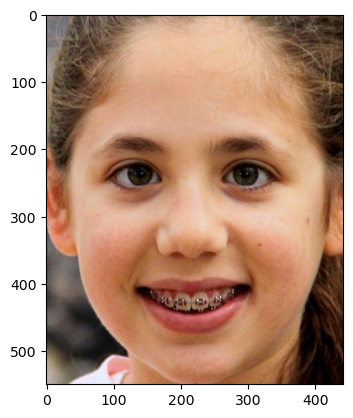

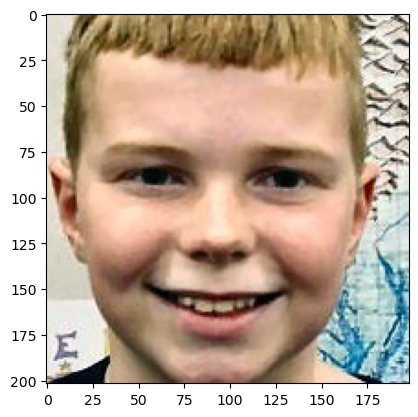

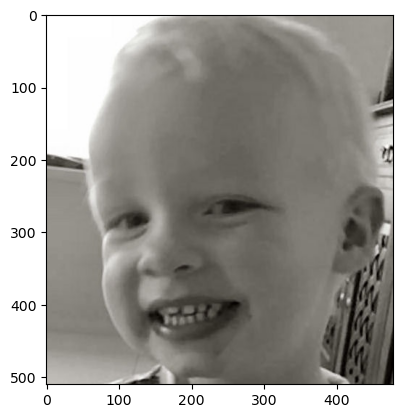

In [4]:
# Plot first 3 images from train_imgs
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

#how do you tackle these os variables and environmental variables :? i mean it takes os why ? when folder is local 
#i have try to remove useing os but it is geting error so i have used online they used os ?, hmm

In [5]:
nrows = 150
ncolumns  = 150
channels = 3


def read_and_process_image(list_of_images):
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows, ncolumns), interpolation = cv2.INTER_CUBIC))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    return X,y
    #im dumb lol
    

In [6]:
X_train, y_train = read_and_process_image(train_imgs)

#but all restored kada how  ? code is untouched YQ I THINK SOME THING HAPPED IN DATASET AFTER ADDING IAM NEW IMAGES
#ARE THEY SAME RESOLUTION ? I THINK NO I HAVE DOWNLOADED AND DIRECTL
#BRUHugh THAYAT S 10X MORE YA I THINK CHANGEING IS BETTER OR REMOVING IS BETTER SO SHALL I DELETE PLEASE SLECT AS YOUR EASEY 
#did this happen before ?NO
#whats consolidate i to not have idea  hmm , didnt we delte  ?no we  valid images 
#today added lev mari avunu 


In [7]:
sns.set_palette(sns.color_palette(["b", "r"]))
plt.figure(figsize=(12, 8))
X_train = np.array(X_train)
y_train = np.array(y_train)

<Figure size 1200x800 with 0 Axes>

In [27]:
def process_data_tsne(list_of_images):
    nrows = 150
    ncolumns  = 150
    channels = 3
    
    X = []
    y = []
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.COLOR_BGR2GRAY), (nrows, ncolumns)))
        if 'Non_Autistic' in image:
            y.append(0)
        else:
            y.append(1)
            
    X = np.asarray(X)
    y = np.asarray(y)
    X = X.reshape(2540, 150*150*3)
    
    return X,y

In [28]:
features, labels = process_data_tsne(train_imgs)


In [29]:
tsne = TSNE(random_state=42).fit_transform(features)
#better to remove i guess bro wwhy i mean it reduces dimension ga ya but how ? i mean youre doing binary class classification kada in last #please change what is better to do and getting good resuls, yea whens the review ?1st think tuesdamyy we got test tga ya but my guid is telling to write proposed method whe mnmeed 

In [30]:
def visualise_tsne_3d(tsne_data, target):
    colour_map = []
    for i in target:
        if i == 1:
            colour_map.append('r')
        else:
            colour_map.append('b')

    fig = plt.figure(figsize=(18, 18))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*zip(*tsne), c=colour_map, s=30, alpha=1)
    legenditems = [(plt.Rectangle((0,0),1,1, color=c), "Non_Autistic" if str(i) == '0' else "Autistic") for i,c in enumerate(np.unique(colour_map))]
    plt.legend(*zip(*legenditems))
    plt.show()

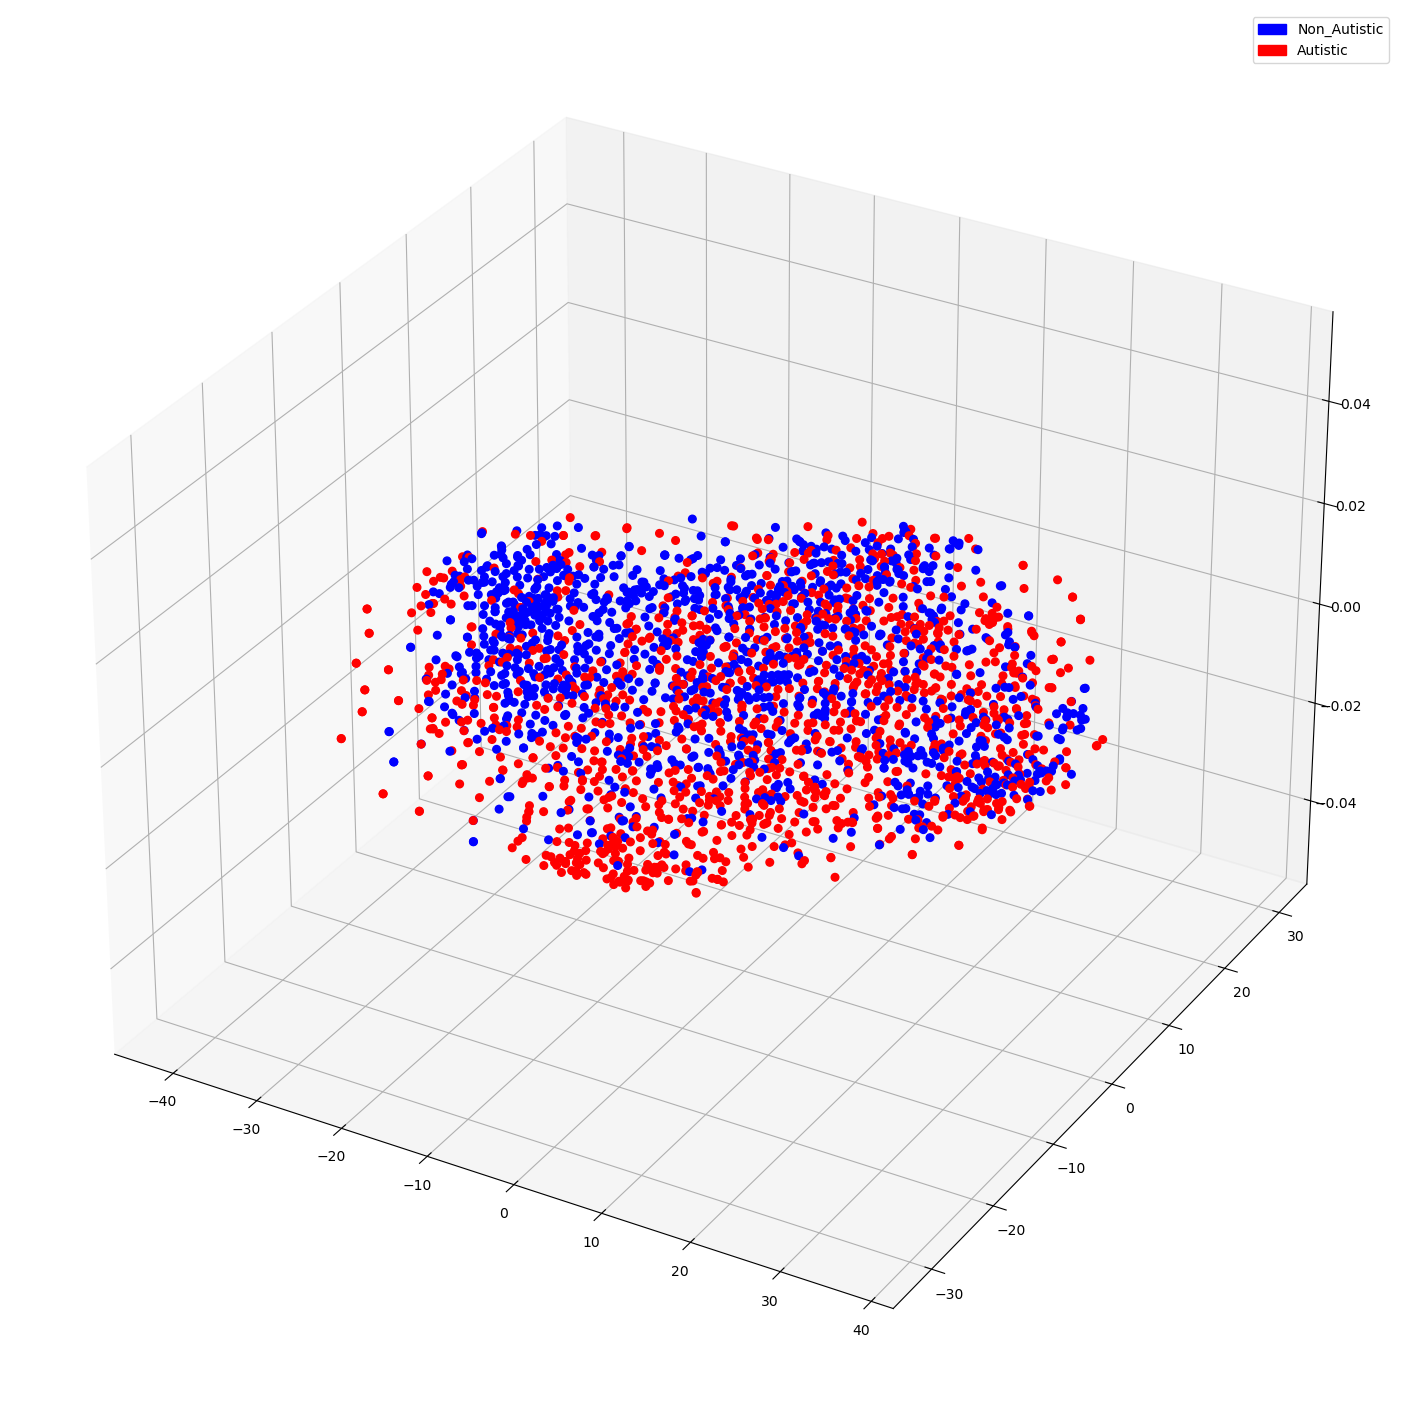

In [31]:
visualise_tsne_3d(tsne, labels)


In [32]:
def visualise_tsne_datapoints(tsne_data, labels):
    
    """Takes in tsne projections, plots distribution of datapoints in 2 classes"""
    
    tx = tsne_data[:,0]
    ty = tsne_data[:,1]
    plt.figure(figsize=(20,18))
    sns.scatterplot(
    x=tx, y=ty,
    hue=labels,
    palette=['blue', 'red'],
    s=300, 
    legend='auto'
    )

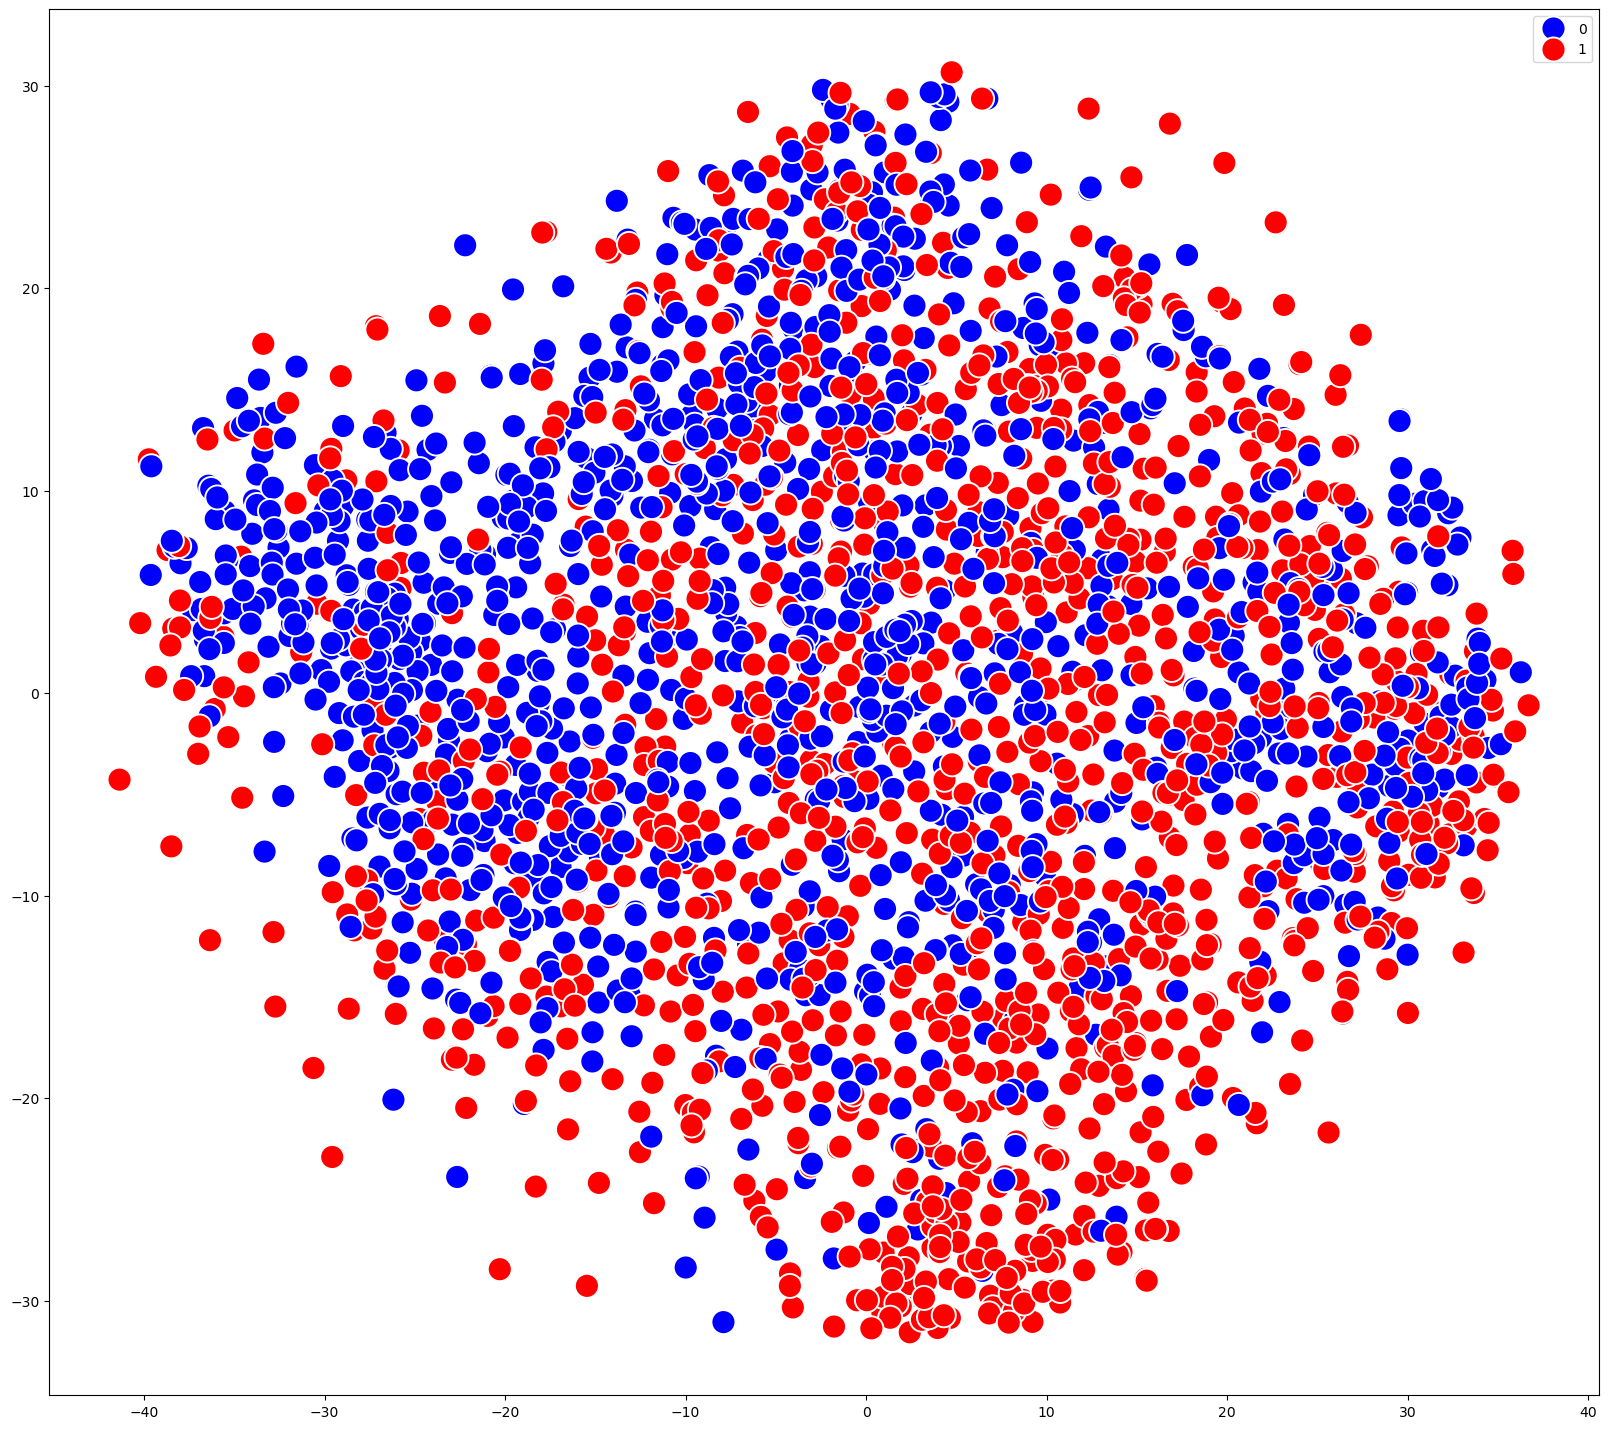

In [33]:
visualise_tsne_datapoints(tsne,labels)


In [34]:
import numpy as np
import os
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

def visualise_tsne_images(tsne_data, train_images, labels):
    tx = tsne_data[:, 0]
    ty = tsne_data[:, 1]
    image_paths = [train_images[i] for i in range(len(train_images))]

    tx = (tx - np.min(tx)) / (np.max(tx) - np.min(tx))
    ty = (ty - np.min(ty)) / (np.max(ty) - np.min(ty))

    width = 4000
    height = 3000
    max_dim = 200

    full_image = Image.new('RGBA', (width, height))
    for img, x, y, label in zip(image_paths, tx, ty, labels):
        tile = Image.open(img)
        rs = max(1, tile.width / max_dim, tile.height / max_dim)
        tile = tile.resize((int(tile.width / rs), int(tile.height / rs)), Image.Resampling.LANCZOS)
        tile_height, tile_width = tile.size
        draw = ImageDraw.Draw(tile)
        draw.rectangle((0, 0, tile_height-1, tile_width-1), fill=None, outline='blue' if label == 0 else 'red', width=8)
        full_image.paste(tile, (int((width - max_dim) * x), int((height - max_dim) * (1 - y))), mask=tile.convert('RGBA'))

    plt.figure(figsize=(30, 28))
    plt.imshow(full_image)
    plt.show()



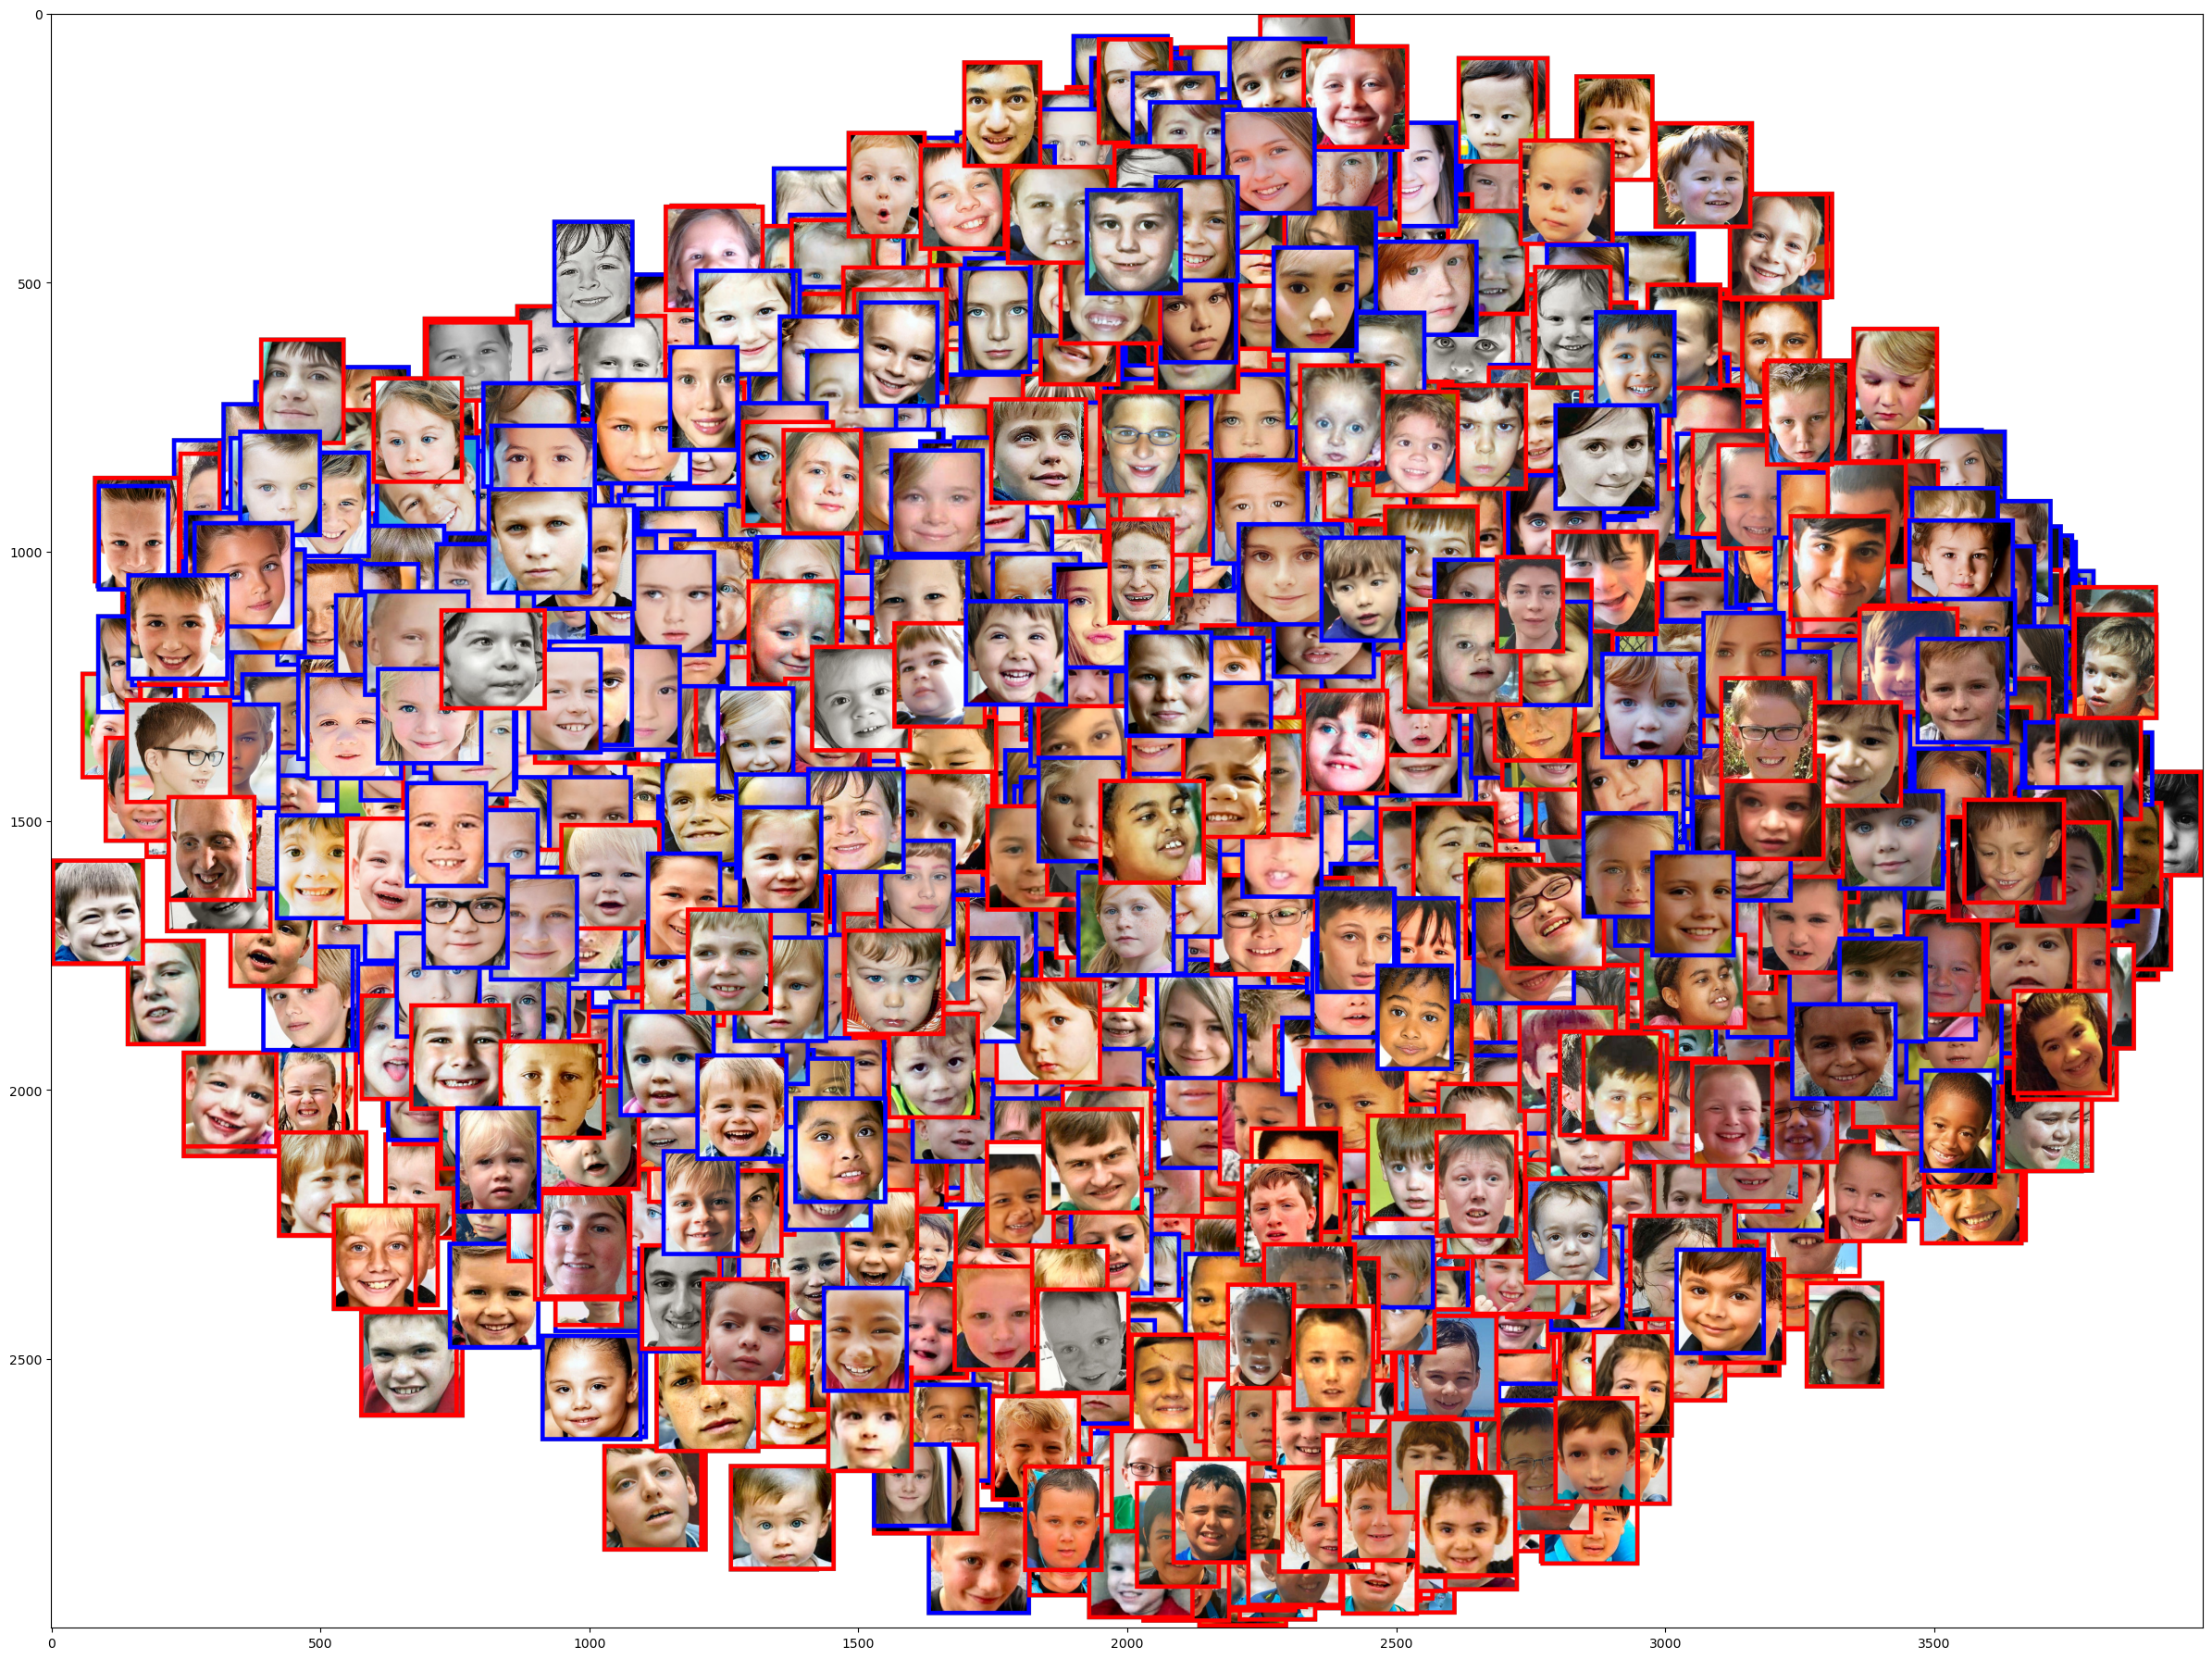

In [35]:
visualise_tsne_images(tsne, train_imgs, labels)


In [36]:
print("Shape of train images:", X_train.shape)
print("Shape of train labels:", y_train.shape)

Shape of train images: (2540, 150, 150, 3)
Shape of train labels: (2540,)


In [37]:
# Define paths for validation data
val_autistic_path =  r"C:\Users\yalal\Downloads\autisum spectrum\valid\Autistic"
val_non_autistic_path =  r"C:\Users\yalal\Downloads\autisum spectrum\valid\Non_Autistic"

# Get file paths for validation images
val_autistic_imgs = [os.path.join(val_autistic_path, i) for i in os.listdir(val_autistic_path)]
val_non_autistic_imgs = [os.path.join(val_non_autistic_path, i) for i in os.listdir(val_non_autistic_path)]
val_imgs = val_autistic_imgs + val_non_autistic_imgs
random.shuffle(val_imgs)
# Remove the lists to save space
del val_autistic_imgs
del val_non_autistic_imgs
gc.collect()
# Get resized images and labels from validation data
X_val, y_val = read_and_process_image(val_imgs)







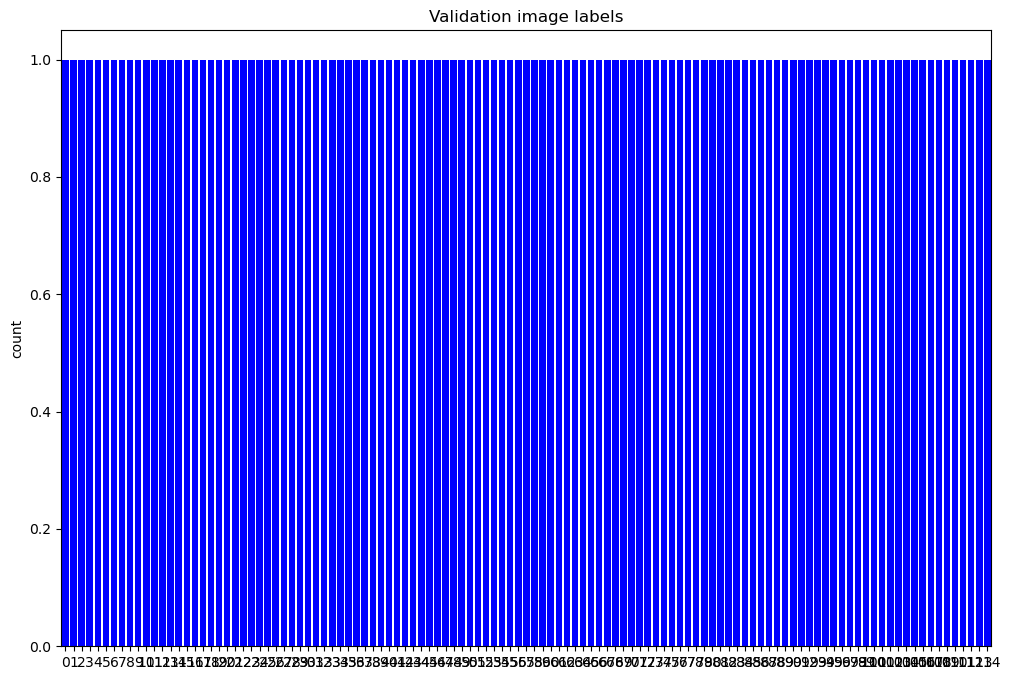

In [38]:

# Convert the lists to arrays
X_val = np.array(X_val)
y_val = np.array(y_val)

# Plot the count of validation image labels
sns.set_palette(sns.color_palette(["b", "r"]))
plt.figure(figsize=(12, 8))
sns.countplot(y_val, saturation=1)
plt.title("Validation image labels")
plt.show()
#didnt understand once check y this plot is not coming properly
#okmat

In [39]:
# Shape of validation images and labels
print("Shape of validation images:", X_val.shape)
print("Shape of validation labels:", y_val.shape)

Shape of validation images: (115, 150, 150, 3)
Shape of validation labels: (115,)


In [40]:
# Get length of train data and validation data
ntrain = len(X_train)
nval = len(X_val)
BATCH_SIZE = 32


In [41]:
# Calling pre-trained VGG16 model
base_model = VGG16(include_top=False,weights='imagenet',input_shape=(150,150,3))

In [42]:
for layer in base_model.layers:
   layer.trainable = False

In [43]:
# Let's see how many layers are in the vgg model
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  19


In [44]:
model = keras.models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [45]:
#model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['acc'])

In [46]:
# Change the learning rate in the Adam optimizer
#model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['acc'])


In [47]:
model.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.Adam(), metrics = ['acc'])

In [48]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 40,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  shear_range = 0.2,
                                  zoom_range = 0.2,
                                  horizontal_flip = True)
                            

# Only rescaling for validation data
val_datagen = ImageDataGenerator(rescale = 1./255)

In [49]:
train_generator = train_datagen.flow(X_train, y_train, batch_size = BATCH_SIZE)
val_generator = val_datagen.flow(X_val, y_val, batch_size = BATCH_SIZE)

In [ ]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)

# Train the model
history = model.fit(train_generator,
                              epochs=30,
                              validation_data=val_generator,
                              callbacks=[early_stopping]
                             )# bro 

Epoch 1/30


C:\Users\yalal\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - acc: 0.5878 - loss: 1.1058 - val_acc: 0.7652 - val_loss: 0.4908
Epoch 2/30
80/80 ━━━━━━━━━━━━━━━━━━━━ 127s 2s/step - acc: 0.7113 - loss: 0.5686 - val_acc: 0.7478 - val_loss: 0.4905
Epoch 3/30
63/80 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - acc: 0.7354 - loss: 0.5360

In [ ]:
history_df = pd.DataFrame(history.history)# after calculation it is coming 70 to 72 only i guss we push to 80 i mean 80 is always good ya #takes too long isnt itya let do git and tell how to do and work with git
history_df

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=history_df.loc[:, ["acc", "val_acc"]], palette=['b', 'r'], dashes=False)
sns.set_style("whitegrid")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuracy")

In [ ]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=history_df.loc[:, ["loss", "val_loss"]], palette=['b', 'r'], dashes=False)
sns.set_style("whitegrid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss")

In [ ]:
def get_features(trained_model, validation_data):
    
    def get_truncated_model(trained_model):
    
        """Takes in the model, Returns truncated model without classification layer"""
        
        model = keras.models.Sequential()
        model.add(base_model)
        model.add(layers.Flatten())
        model.add(layers.Dense(512, activation = 'relu'))
        
        for i, layer in enumerate(model.layers):
            layer.set_weights(trained_model.layers[i].get_weights())
            
        model.compile(optimizer = keras.optimizers.Adam(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
        return model

    # Get truncated model
    truncated_model = get_truncated_model(model)
    
    # Use truncated model to predict features from the last hidden layer
    features = truncated_model.predict(validation_data)
        
    return features

In [ ]:
features = get_features(model, val_generator)


In [ ]:
tsne_model = TSNE(random_state=42, perplexity=4).fit_transform(features)


In [ ]:
visualise_tsne_datapoints(tsne_model, y_val)


In [ ]:
def visualise_model_tsne_3d(tsne_model, val_labels):
    colour_map = [] 
    for i in val_labels: 
        if i == 1: 
            colour_map.append('r') 
        else: 
            colour_map.append('b')

    fig = plt.figure(figsize=(18, 18))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(*zip(*tsne_model), c=colour_map, s=50, alpha=1)
    legenditems = [(plt.Rectangle((0,0),1,1, color=c), "Non_Autistic" if str(i) == '0' else "Autistic") for i,c in enumerate(np.unique(colour_map))]
    plt.legend(*zip(*legenditems))
    plt.show()

In [ ]:
visualise_model_tsne_3d(tsne_model, y_val)


In [ ]:
visualise_tsne_images(tsne_model, train_imgs, y_val)


In [ ]:
random.shuffle(test_imgs)
X_test, y_test = read_and_process_image(test_imgs)
X = np.array(X_test)

In [ ]:
sns.set_palette(sns.color_palette(["b", "r"]))
plt.figure(figsize=(12, 8))
sns.countplot(y_test, saturation=1);

In [ ]:
pred = model.predict(X)
threshold = 0.5
predictions = np.where(pred > threshold, 1,0)

In [ ]:
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

In [ ]:
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

In [ ]:
test = pd.DataFrame(data = predictions, columns = ["predictions"])
test
test["filename"] = [os.path.basename(i) for i in test_imgs]
test["test_labels"] = y_test
test = test[["filename", "test_labels", "predictions"]]
test

In [ ]:
model_accuracy = accuracy_score(y_test, predictions)
print("Model Accuracy: {:.2f}%".format(model_accuracy * 100))

In [ ]:
cl_report = classification_report(y_test, predictions)
print(cl_report)

In [ ]:
cn_matrix= confusion_matrix(y_test, predictions)
cn_matrix

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
ax = sns.heatmap(cn_matrix, annot=True)
ax.set_xlabel("Predicted")
ax.set_ylabel("True")
ax.set_title("Confusion Matrix")

In [ ]:
fpr, tpr, _ = roc_curve(y_test, predictions)
roc_auc= auc(fpr, tpr)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([1,0], [1,0], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("Receiver Operating Characteristic curve")
plt.legend(loc = 'lower right')

In [ ]:
plt.figure(figsize=(4,4))
for val, i in enumerate(test_imgs[:10]):
    img = mpimg.imread(i)
    imgplot = plt.imshow(img)
    plt.title('Actual: ' + os.path.basename(i) + ' / Prediction: ' +  f"{'Autistic' if predictions[val] == 1 else 'Non-Autistic'}")
    plt.show()